# Chapter 13: Combining Models



## Import required packages

In [1]:
# install dmba package

!pip install dmba

In [2]:
# import necessary packages

import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from dmba import classificationSummary, plotDecisionTree

## Universal Bank Data

In [3]:
# define bank_df, load data UniversalBank.csv
# preview it

bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# define x, drop the columns: 'Personal Loan', 'ID', 'ZIP Code'
# define y, 'Personal Loan'

x = bank_df.drop(columns = ['Personal Loan', 'ID', 'ZIP Code'])
y = bank_df['Personal Loan']

# split into training and validation
# test_size=0.4, random_state

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

### Single Tree

In [5]:
# define defaultTree, DecisionTreeClassifier()
# just use random_state=1

defaultTree = DecisionTreeClassifier(random_state=1)
# fit it with the training data

defaultTree.fit(train_x, train_y)

DecisionTreeClassifier(random_state=1)

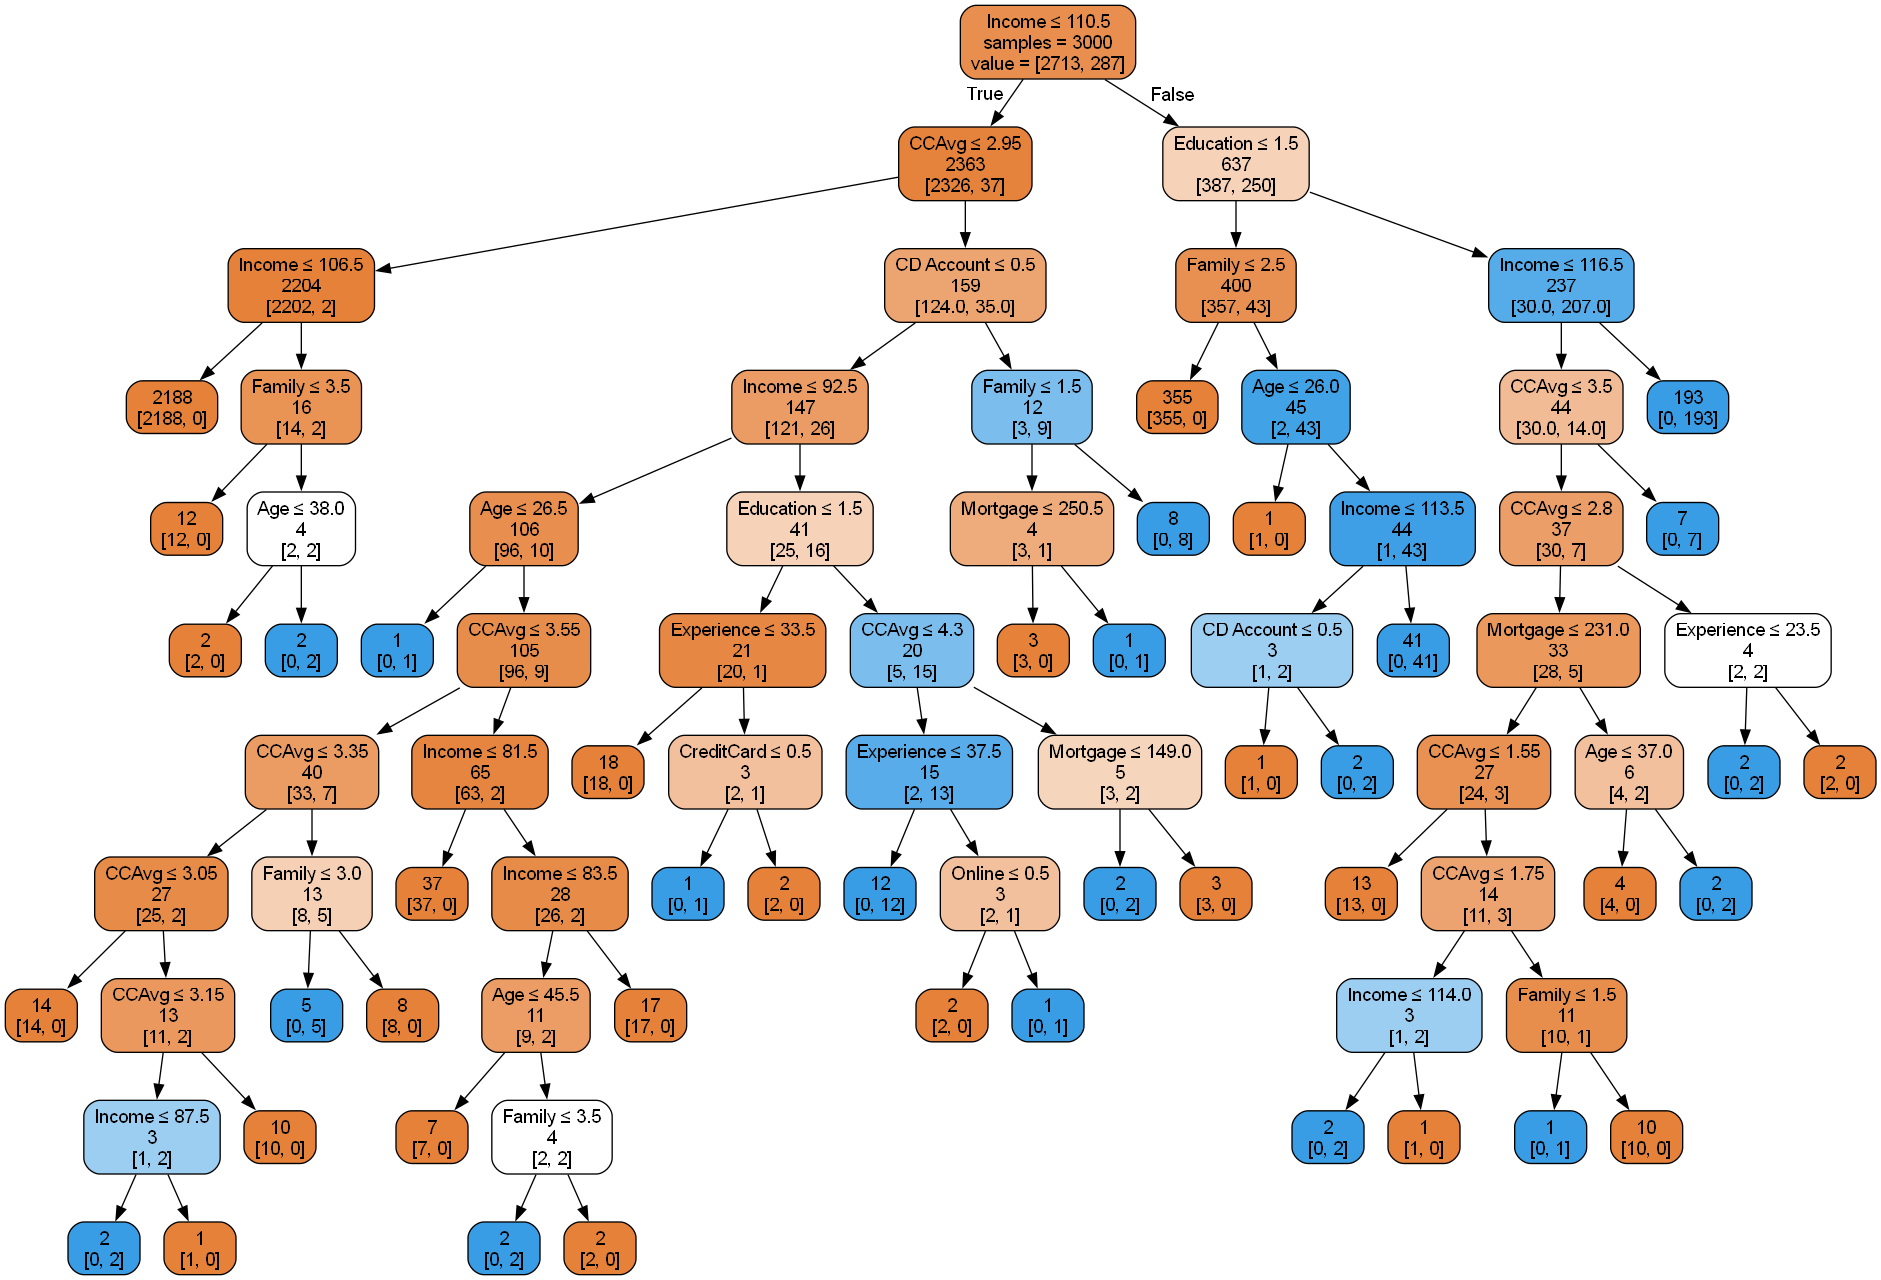

In [6]:
# plot the tree

plotDecisionTree(defaultTree, feature_names=train_x.columns)

In [8]:
# check the confusion matrix, with actual y and predicted y, from the validation data

classificationSummary(valid_y, defaultTree.predict(valid_x))

Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


### Ensemble: Bagging

In [11]:
# define bagging, BaggingClassifier()
# setting: DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1
# DecisionTreeClassifier(random_state=1) as the base estimator, then run it on 100 trees

bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)

# fit it with the training data

bagging.fit(train_x, train_y)
# check the confusion matrix, with actual y and predicted y, from the validation data

classificationSummary(valid_y, bagging.predict(valid_x))

Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1798    9
     1   28  165


### Ensemble: Boosting

In [14]:
# define boost, AdaBoostClassifier(), Adaptive Boosting
# setting: DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1
# train the base estimator sequentially, focuses on errors made previously, give more weights to misclassified instances

boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
# fit it with the training data

boost.fit(train_x, train_y)
# check the confusion matrix, with actual y and predicted y, from the validation data

classificationSummary(valid_y, boost.predict(valid_x))

Confusion Matrix (Accuracy 0.9785)

       Prediction
Actual    0    1
     0 1788   19
     1   24  169


C:\Users\orlan\OneDrive\Desktop\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Voter Data

In [17]:
# define voter_df, load Voter-Persuasion.csv

voter_df = pd.read_csv('Voter-Persuasion.csv')
# preview it

voter_df.head()
# NH_White: Neighborhood average of % non-Hispanic white in household
# Comm_PT: Neighborhood % of workers who take public transit
# H_F1: Single female household (1 = yes)

# Reg_Days: Days since voter registered at current address
# PR_Pelig: Voted in what % of non-presidential primaries
# E_Pelig: Voted in what % of any primaries
# Political_C: Is there a political contributor in the home? (1 = yes)

# MESSAGE_A: a message sent to a voter (1=sent; 0=not sent)

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,...,S,1,0,N,N,N,N,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,...,S,1,0,N,N,N,N,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,...,L,1,0,N,N,N,Y,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,...,S,1,0,N,N,N,N,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,...,S,1,0,N,N,N,N,0,1,T


In [18]:
# check info()

voter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VOTER_ID       10000 non-null  int64 
 1   SET_NO         10000 non-null  int64 
 2   OPP_SEX        10000 non-null  int64 
 3   AGE            10000 non-null  int64 
 4   HH_ND          10000 non-null  int64 
 5   HH_NR          10000 non-null  int64 
 6   HH_NI          10000 non-null  int64 
 7   MED_AGE        10000 non-null  int64 
 8   NH_WHITE       10000 non-null  int64 
 9   NH_AA          10000 non-null  int64 
 10  NH_ASIAN       10000 non-null  int64 
 11  NH_MULT        10000 non-null  int64 
 12  HISP           10000 non-null  int64 
 13  COMM_LT10      10000 non-null  int64 
 14  COMM_609P      10000 non-null  int64 
 15  MED_HH_INC     10000 non-null  int64 
 16  COMM_CAR       10000 non-null  int64 
 17  COMM_CP        10000 non-null  int64 
 18  COMM_PT        10000 non-nu

In [19]:
# define x, ['AGE', 'NH_WHITE', 'COMM_PT', 'H_F1', 'REG_DAYS', 'PR_PELIG', 'E_PELIG', 'POLITICALC', 'MESSAGE_A']

x = voter_df[['AGE', 'NH_WHITE', 'COMM_PT', 'H_F1', 'REG_DAYS', 'PR_PELIG', 'E_PELIG', 'POLITICALC', 'MESSAGE_A']]
# define y, 'MOVED_AD'; indicating whether opinion has moved after receiving the message

y = voter_df.MOVED_AD

# use value_counts() for the MOVED_AD column

voter_df.MOVED_AD.value_counts()

MOVED_AD
N    6266
Y    3734
Name: count, dtype: int64

In [31]:
# Partition the data
# test_size=0.4, random_state=1


train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [32]:
# define rf, RandomForestClassifier()
# n_estimators=100, random_state=1
# Train with the training data


rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

In [33]:
# check the confusion matrix, with actual y and predicted y, from the validation data
# setting: class_names=rf.classes_

classificationSummary(valid_y, rf.predict(valid_x), class_names=rf.classes_)

Confusion Matrix (Accuracy 0.6415)

       Prediction
Actual    N    Y
     N 2018  450
     Y  984  548


In [27]:
# preview valid_x


valid_x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2764,31,5,84,1,2.9,3,105,0,0,0,1
4767,35,9,45,3,0.9,1,101,1,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,1,0
2735,36,12,70,3,2.6,2,165,0,0,1,0


In [36]:
# define uplift_df, copy() of valid_x, to allow modifying data

uplift_df = valid_x.copy()

# Uplift is estimated for each individual by:
# P(Success ∣ Treatment = 1) − P(Success ∣ Treatment = 0).


# set uplift_df.MESSAGE_A = 1 (receive the treatment)
# define predTreatment, rf.predict_proba(uplift_df), propability of predicting 1, with [:,1]

uplift_df.MESSAGE_A = 1 

predTreatment = rf.predict_proba(uplift_df)[:,1]

# set uplift_df.MESSAGE_A = 0 (no treatment)
# define predControl, rf.predict_proba(uplift_df), propability of predicting 1, with [:,1]

uplift_df.MESSAGE_A = 0 

predControl = rf.predict_proba(uplift_df)[:,1]

# define new df, upliftResult_df, with 3 columns
# 'probMessage': predTreatment
# 'probNoMessage': predControl
# 'uplift': predTreatment - predControl
# set the index: index=uplift_df.index

upliftResult_df = pd.DataFrame({
    'probMessage': predTreatment,
    'probNoMessage': predControl,
    'uplift': predTreatment - predControl    
}, index = uplift_df.index
)


# preview upliftResult_df


upliftResult_df.head()

,probMessage,probNoMessage,uplift
9953,0.77,0.62,0.15
3850,0.39,0.39,0.00
4962,0.20,0.14,0.06
3886,0.86,0.62,0.24
5437,0.10,0.28,-0.18


In [37]:
# sort upliftResult_df, sort_values('uplift')
# add: ascending=False

upliftResult_df.sort_values('uplift', ascending=False)

,probMessage,probNoMessage,uplift
2336,0.838667,0.070000,0.768667
2617,0.780000,0.120000,0.660000
3659,0.820000,0.160000,0.660000
2722,0.910000,0.290000,0.620000
9308,0.813333,0.200000,0.613333
...,...,...,...
8990,0.130000,0.620000,-0.490000
7839,0.143333,0.653333,-0.510000
4071,0.030000,0.570000,-0.540000
8714,0.070000,0.620000,-0.550000
